In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def show(img):
    rgb =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(rgb, cmap='gray')

# Exercise correctness

# Histogram

In [ ]:
img = cv2.imread("images/SG1.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

hist = []
for _ in range(256):
    hist.append(0)


height = gray.shape[0]
width = gray.shape[1]
print(hist)

print(f'height: {height}')
print(f'width: {width}')

S = height*width
print(f'S: {S}')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
height: 376
width: 500
S: 188000


In [ ]:

def calculate_hist (gray):
    hist = []
    for _ in range(256):
        hist.append(0)

    for y in range(height):
        for x in range(width):
            gray_value = gray[y,x]
            hist[gray_value] = hist[gray_value] + 1

    return  hist

hist = calculate_hist( gray)
len(hist)

256

# Draw Histogram

In [ ]:
def plot_histogram(histogram):
    x =[]
    for i in range(256):
        x.append(i)


    plt.figure(figsize=(20,8))
    plt.bar(x,histogram)
    plt.title("Histogram")
    plt.xlabel("Gray value")
    plt.ylabel("Number of Pixel")
    plt.show()

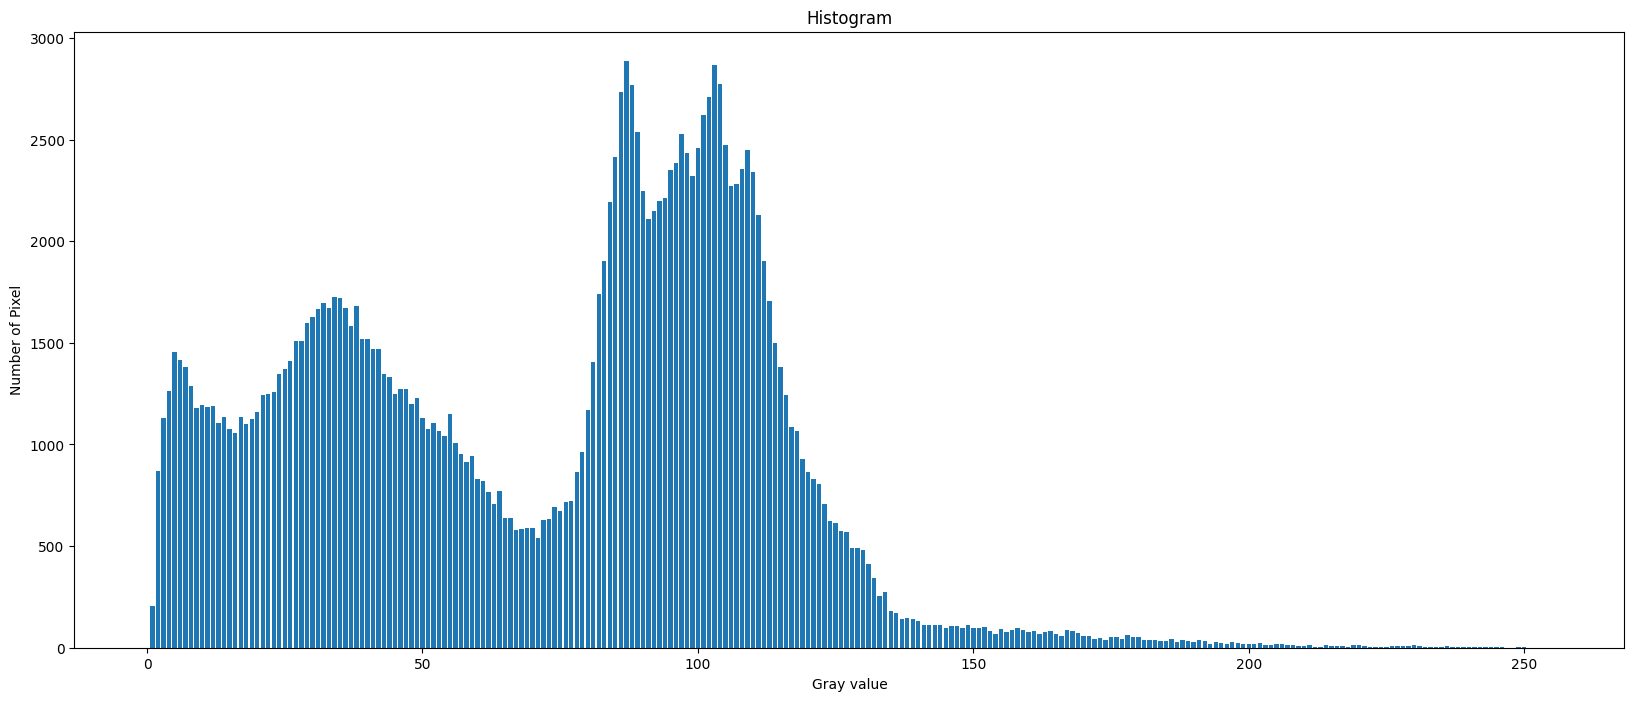

In [ ]:
plot_histogram(hist)

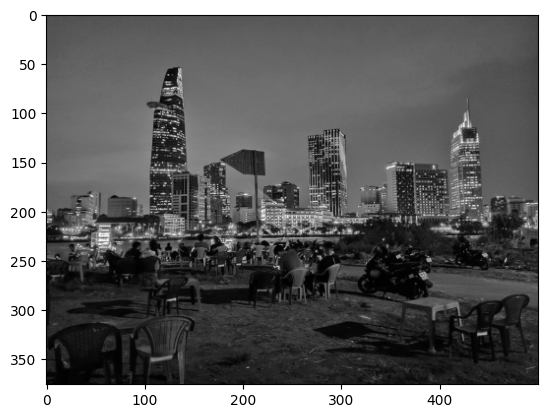

In [ ]:
plt.imshow(gray, cmap ="gray")

# Histogram Equalization
$$ h(v) = round(\frac{cdf_{v} - cdf_{min}}{(M*N) - cdf_{min}} * (L-1))$$

In [ ]:
len(hist)

256

In [ ]:
for j in range(1):
    print(j)

0


In [ ]:
L = 256
S = width * height


cdf =[]
for i  in range(256):
    cdf.append(0)


for i in range(len(hist)):

    cdf_v = 0
    for j in range(i+1):
        cdf_v += hist[j]

    cdf[i] = cdf_v

len(cdf)

256

In [ ]:
cdf[205]

187689

In [ ]:

def histogram_equalization(gray, cdf,L=256):
    height = gray.shape[0]
    width = gray.shape[1]

    min_cdf = min(cdf)

    histogram_space  = np.zeros((height,width),dtype= np.uint8)

    for y in range(height):
        for x in range (width):
            gray_value = gray [y,x]

            cdf_v = cdf[gray_value]

            h_v = int(((cdf_v - min_cdf) / (height*width - min_cdf)) *  (L -1))

            histogram_space [y,x] = h_v

    return  histogram_space

In [ ]:
histogram_space = histogram_equalization(gray, cdf)

In [ ]:
hist_1 = calculate_hist(histogram_space)
len(hist_1)

256

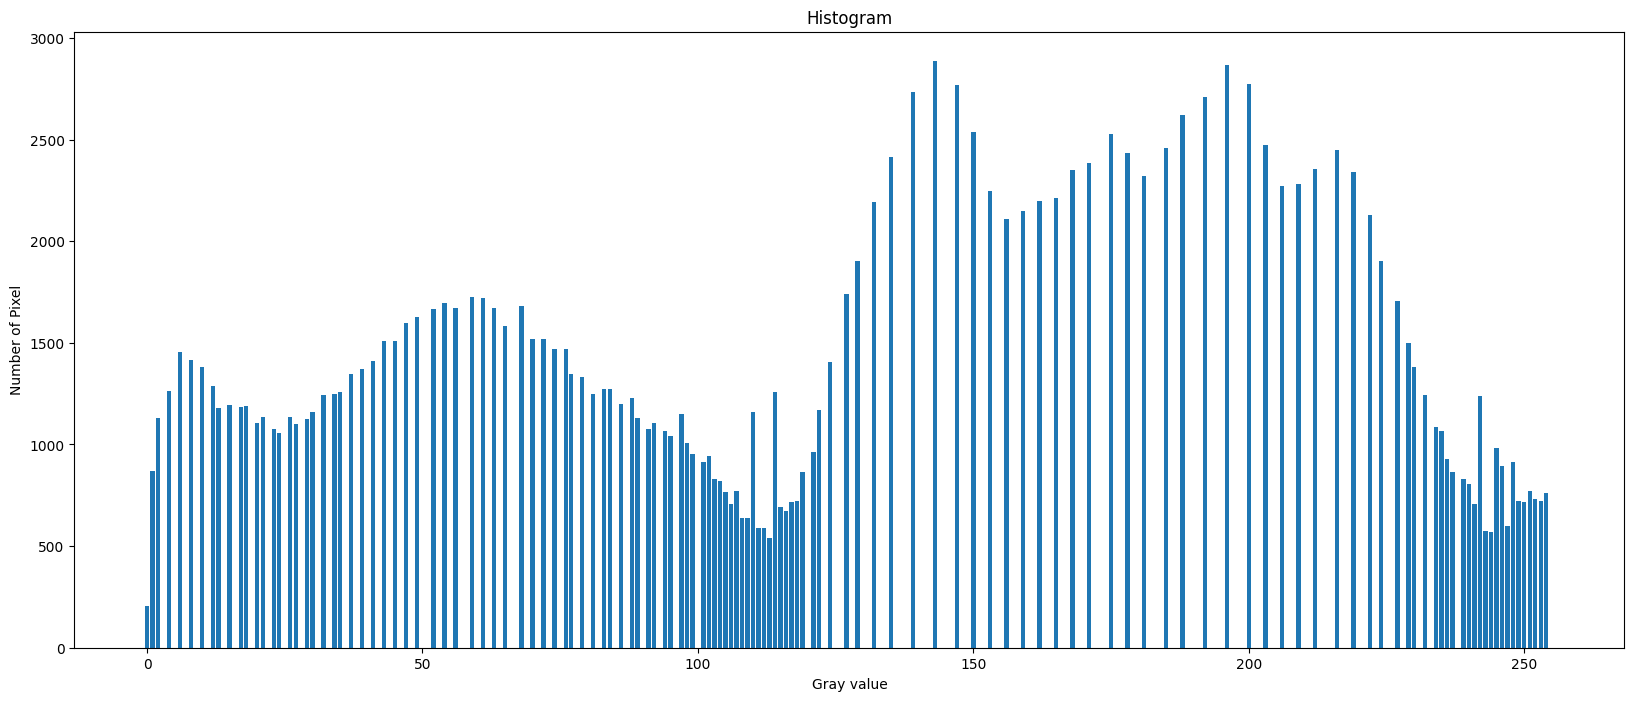

In [ ]:
plot_histogram(hist_1)

# Contrast Increasement

Emphasize
1. Kernel
2. Sliding window



$$ r = round ((orig  - mean)*factor) + orig$$

* mean: the mean of window with kernel width and kernel height
* factor: double
* orig: gray value
* r: new gray value

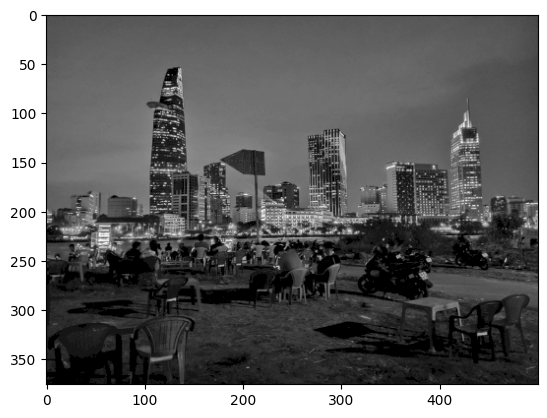

In [ ]:
img  = cv2.imread("images/SG1.png", 0 )
plt.imshow(img, cmap = "gray")

## Crop Image and Calculate Mean gray value

42.05210843373494

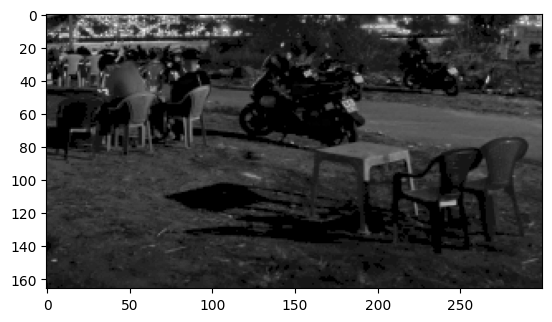

In [ ]:
crop = img[210:450, 200:620]
plt.imshow(crop, cmap = "gray")

mean  = np.mean(crop)
mean

In [ ]:
matrix  = np.array([
    [3,4],[6,7]
])

matrix.shape

mean = np.mean(matrix)
mean

5.0

In [ ]:
def cal_mean(matrix):
    sum = 0
    for y in range(matrix.shape[0]):
        for x in range(matrix.shape[1]):
            sum += matrix[y,x]


    width = matrix.shape[1]
    height = matrix.shape[0]

    return sum/(width*height)

In [ ]:
mean = cal_mean(matrix)
mean

5.0

## Emphasize Function

In [ ]:
def mean(kernel:np.ndarray):

    return np.mean(kernel)

def emphasize_f(img, kernel, factor):
    """
    # Input Value
    --------------------------
        * normal image
        * kernel size (kernel width, kernel height)
        * factor
        * broadcasting (img[y:y+k_h, x:x+k_w] - mean_value )  * factor

    # Output value

    --------------------------
    * image emphasized
    """
    img = image.copy()
    height,width = image.shape

    emphasize_space = np.zeros((height,width))

    for y in range(height - k_height ):
      for x in range(width - k_width):
        crop  = image[y : y+k_height , x: x+k_width]
        mean_value = mean(crop)
        for j in range(k_height):
          for i in range(k_width):
            ori = int(image[y+j ,x+i])
            new_value = int((ori-mean_value)*factor) + ori

            if new_value <=0 :
              new_value = 0
            elif new_value >=255 :
              new_value =255
            emphasize_space[y : y+j , x: x+i] = value

    return emphasize_space

In [ ]:
emphasize_space = emphasize_f(img,(7,7),1)
emphasize_space

In [ ]:
plt.imshow(emphasize_space,cmap="gray")

In [ ]:
plot_histogram(calculate_hist(img))

In [ ]:
plot_histogram(calculate_hist(emphasize_space))